In [1]:
import numpy as np

# What UCI datasets do i want to test End2End vs RandFeatBoost

1. Letter Recognition  https://archive.ics.uci.edu/dataset/59/letter+recognition   20k obs, 16 numerical features. 26 classes

2. IJCNN1
Description: Used in the International Joint Conference on Neural Networks (2001), designed for binary classification of patterns derived from real-world data.
Observations: 141,691 (49,990 training; 91,701 test).
Features: 22 (continuous numerical attributes).
Classes: 2 (binary classification: +1 and -1).

<!-- 3. Covertype
Description: Predict forest cover type from cartographic variables.
Observations: 581,012
Features: 54 (continuous and categorical)
Classes: 7
Type: Multiclass classification. -->

3. MNIST (Modified National Institute of Standards and Technology)
Description: A classic benchmark dataset for handwritten digit recognition, widely used in deep learning research.
Observations: 70,000 (60,000 training; 10,000 test).
Features: 784 (28x28 grayscale pixel intensities, values from 0 to 255).
Classes: 10 (digits 0–9).
Type: Multiclass classification.

# What do i want to do with these?

Plot accuracy vs number of boosting iterations (number of layers). Kinda like this

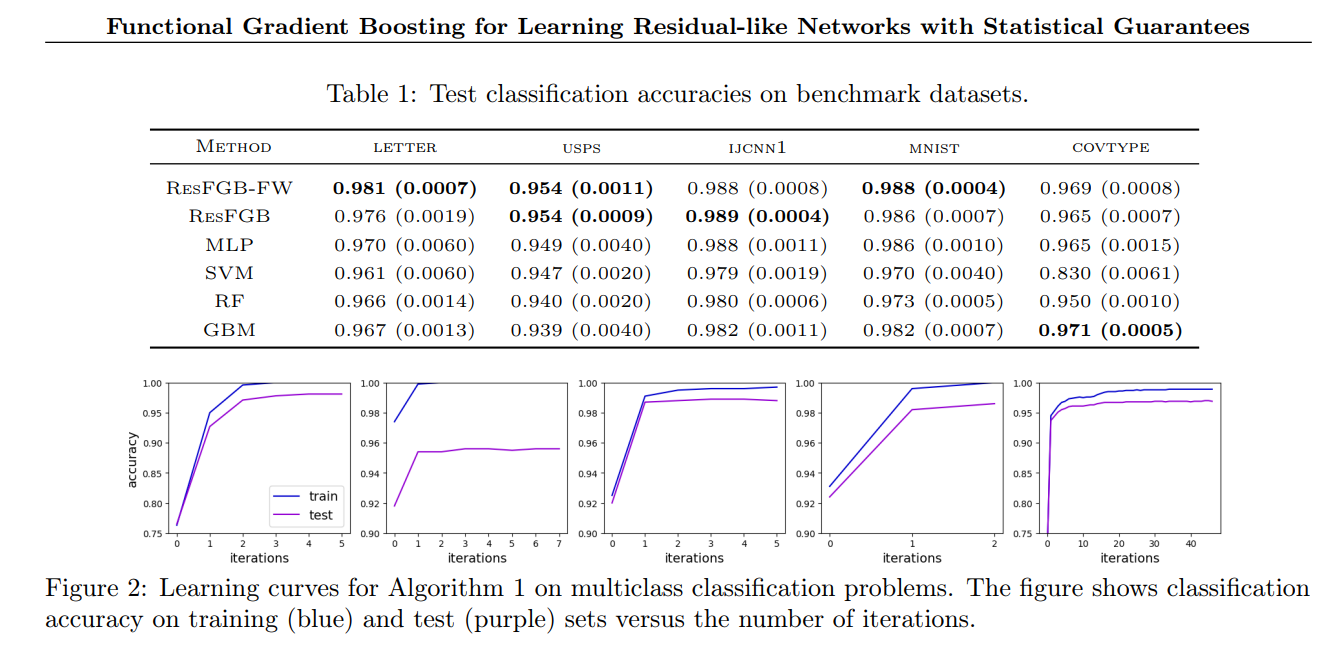

Use designated test set. Start by experimenting on LETTER. assign covtype its own test set

* split train into inner_train, inner_validation
* do hyperparameter tuning on inner_valdiation (or 5 folds?)
* fit on all of train using best hyperparams
* evaluate on test set using best hyperparams
* repeat 5 times

In [ ]:

import torch
import torch.nn as nn
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import models

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
random.seed(seed)

